## 引言
我一直认为没有必要在考试中求截面矩和质心一类玩意，因为现在的电脑太容易求出这些几何性质的量了。Ansys和AutoCAD都内置了相关函数，其实就算要求解析解也不困难，这里就做个演示。

In [1]:
%pylab inline
from sympy import Polygon, Point, var, init_printing, simplify, series
import sympy
init_printing()
var('b,h,t')
from second_moments import second_moments

Populating the interactive namespace from numpy and matplotlib


## 矩形截面：
假设宽为b，高为h。

In [2]:
p = map(Point,((0,0),(b,0),(b,h),(0,h)))
poly = Polygon(*p)
poly.area

In [3]:
poly.centroid

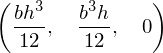

In [4]:
Ix, Iy, Ixy = second_moments(poly)
Ix, Iy, Ixy

## L形截面
假设厚度都是t,宽为b，高为h

In [5]:
p = map(Point,((0,0),(b,0),(b,t),(t,t),(t,h),(0,h)))
poly = Polygon(*p)
poly.area

In [6]:
simplify(poly.centroid)

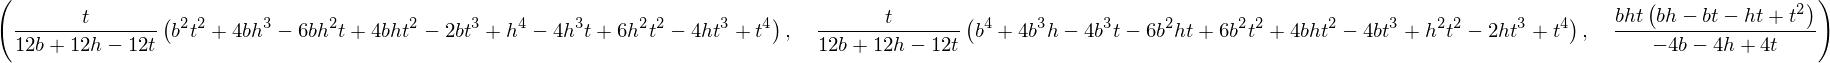

In [7]:
Ix, Iy, Ixy = simplify(second_moments(poly))
Ix, Iy, Ixy

你实际上还可以得到$t$是小量时候的二阶近似

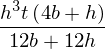

In [8]:
simplify(sympy.series(Ix,t,n=2).removeO())

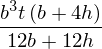

In [9]:
simplify(sympy.series(Iy,t,n=2).removeO())

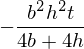

In [10]:
simplify(sympy.series(Ixy,t,n=2).removeO())

## 六边形：
外接圆半径为R的吧！

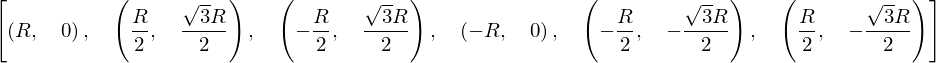

In [11]:
var('R')
p = [(sympy.cos(i)*R,sympy.sin(i)*R) for i in arange(6)/sympy.S.One/3*sympy.pi]
poly = Polygon(*p)
p

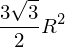

In [12]:
poly.area

In [13]:
poly.centroid

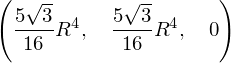

In [14]:
second_moments(poly)

## 工字梁
等厚为$t$的情况。

In [15]:
p = map(Point,((0,0),(b,0),(b,t),(b/2+t/2,t),(b/2+t/2,h-t),
(b,h-t),(b,h),(0,h),(0,h-t),(b/2-t/2,h-t),(b/2-t/2,t),(0,t))
)
poly = Polygon(*p)
poly.area,poly.centroid

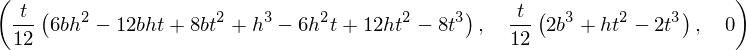

In [16]:
I = second_moments(poly)
Ix,Iy,Ixy=map(simplify,I)
Ix, Iy, Ixy

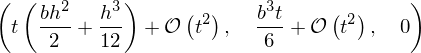

In [17]:
series(Ix,t,0,2), series(Iy,t,0,2), series(Ixy,t,0,2)

翼缘和肋板不等厚的情况，翼缘为$t1$，肋板为$t2$的情况。

In [18]:
var('t1,t2')
p = map(Point,((0,0),(b,0),(b,t1),(b/2+t2/2,t1),(b/2+t2/2,h-t1),
(b,h-t1),(b,h),(0,h),(0,h-t1),(b/2-t2/2,h-t1),(b/2-t2/2,t1),(0,t1))
)
poly = Polygon(*p)
poly.area,poly.centroid

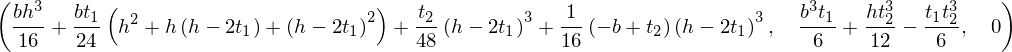

In [19]:
I = second_moments(poly)
Ix,Iy,Ixy=map(simplify,I)
Ix, Iy, Ixy

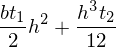

In [20]:
series(series(series(Ix,t1,n=2),t2,n=2).removeO().expand(),t1*t2,n=1).removeO()

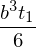

In [21]:
series(series(series(Iy,t1,n=2),t2,n=2).removeO().expand(),t1*t2,n=1).removeO()

In [22]:
series(series(series(Ixy,t1,n=2),t2,n=2).removeO().expand(),t1*t2,n=1).removeO()

## 槽钢的情况
等厚为$t$

In [23]:
p = map(Point,((0,0),(b,0),(b,t),(t,t),(t,h-t),
(b,h-t),(b,h),(0,h)))
poly = Polygon(*p)
poly.area,poly.centroid

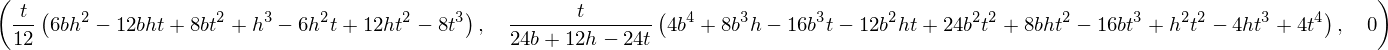

In [24]:
I = second_moments(poly)
Ix,Iy,Ixy=map(simplify,I)
Ix, Iy, Ixy

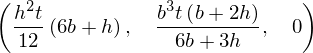

In [25]:
simplify(series(Ix,t,0,2).removeO()), simplify(series(Iy,t,0,2).removeO()), series(Ixy,t,0,2)